<a href="https://colab.research.google.com/github/ivanyspaez/AlgorithmsUN2022I/blob/main/Lab2/Isepulveda_ScottSanderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U fortran-magic #Instalación de Fortran 

In [ ]:
reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://github.com/ivanyspaez/AlgorithmsUN2022I/blob/main/images/me.jpg?raw=1" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh no!"

In [ ]:
l = [1, 'two',True,4, -5.0, "six"]
l

[1, 'two', True, 4, -5.0, 'six']

In [ ]:
y = [18,35,"tree",True,4, 5.0, ""]
y

[18, 35, 'tree', True, 4, 5.0, '']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
primero=y[0]
segundo=y[1]
print("Primero",primero," y segundo",segundo)

Primero 18  y segundo 35


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: -5.0


In [ ]:
ultimo = y[-1]
penultimo = y[-2]
print("ultimo",ultimo,"y penultimo",penultimo)

ultimo  y penultimo 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', True]

In [ ]:
sublist = y[1:4]
sublist

[35, 'tree', True]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_c = l[:3]
first_c

[1, 'two', True]

In [ ]:
primeros_d=y[:4]
primeros_d

[18, 35, 'tree', True]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, -5.0, 'six']

In [ ]:
desde_tercero = y[3:]
print(y)
desde_tercero

[18, 35, 'tree', True, 4, 5.0, '']


[True, 4, 5.0, '']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
l[1:7:2]

['B', 'D', 'F']

In [ ]:
n=['123','234','345','456','567','678','789','890']
n[2:8:2]

['345', '567', '789']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['G', 'F', 'E', 'D', 'C', 'B', 'A']

In [ ]:
n[::-1] #Lista invertida

['890', '789', '678', '567', '456', '345', '234', '123']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
print(n)
n.append("e") #Adicionar elemento a la lista
print(n)

['123', '234', '345', '456', '567', '678', '789', '890']
['123', '234', '345', '456', '567', '678', '789', '890', 'e']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [ ]:
a = [1,1,3,5,8,13,21,34]
[item /2 for item in a ] #recorro la lista y le sumo uno a cada elemento

[0.5, 0.5, 1.5, 2.5, 4.0, 6.5, 10.5, 17.0]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
personas = {'Ivan': 'Paez', 'Pepito': 'Perez'}
personas

{'Ivan': 'Paez', 'Pepito': 'Perez'}

In [ ]:
Alimentos = {"Uvas":"Fruta",
             "Papa":"Verdura",
             "Aguacate":"Fruta",
             "Mango":"Fruta",
             "Lechuga":"Verdura"}
Alimentos

{'Aguacate': 'Fruta',
 'Lechuga': 'Verdura',
 'Mango': 'Fruta',
 'Papa': 'Verdura',
 'Uvas': 'Frutos'}

In [ ]:
# Like lists, dictionaries are size-mutable.
personas['Ludwig'] = 'Wittgenstein'
personas

{'Ivan': 'Paez', 'Ludwig': 'Wittgenstein', 'Pepito': 'Perez'}

In [ ]:
Alimentos["Frijol"]="Verdura" #Agregar elemento al diccionario
Alimentos

{'Aguacate': 'Fruta',
 'Frijol': 'Verdura',
 'Lechuga': 'Verdura',
 'Mango': 'Fruta',
 'Papa': 'Verdura',
 'Uvas': 'Frutos'}

In [ ]:
del personas['Ivan']
philosophers

{'Ivan': 'Paez', 'Ludwig': 'Wittgenstein', 'Pepito': 'Perez'}

In [ ]:
del Alimentos["Mango"] # del - Elimina un elemento del diccionario
Alimentos

{'Aguacate': 'Fruta',
 'Frijol': 'Verdura',
 'Lechuga': 'Verdura',
 'Papa': 'Verdura',
 'Uvas': 'Frutos'}

In [ ]:
# No slicing.
personas=['Bertrand':'Immanuel']

TypeError: ignored

In [ ]:
Alimentos["Manzana":"Fruta"] #No hay slicing en los diccionarios

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://github.com/ivanyspaez/AlgorithmsUN2022I/blob/main/images/pacino.gif?raw=1" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 1, 1],
     [2, 2, 2],
     [3, 4, 5],
     [6, 7, 8]]

b = [[4, 3, 2, 1],
     [5, 4, 3, 2]]

In [ ]:
c=[[24,39,21,13],
   [27,38,19,1],
   [8,9,18,7,21],
   [17,7,34,16]]

d=[[6,4,8,3],
   [11,21,6,36],
   [25,37,8,19]]

In [ ]:
def mat(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [ ]:
%%time

mat(a, b)

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 32.7 µs


[[9, 7, 5, 3], [18, 14, 10, 6], [32, 25, 18, 11], [59, 46, 33, 20]]

In [ ]:
# time cuenta el tiempo de el codigo que ejecutamos
%%time 
mat(c,d)

CPU times: user 54 µs, sys: 4 µs, total: 58 µs
Wall time: 63.4 µs


[[1098, 1692, 594, 1875],
 [1055, 1609, 596, 1810],
 [597, 887, 262, 690],
 [1029, 1473, 450, 949]]

In [ ]:
import random
def random_matrix(m, n): #crea una matriz aleatoria con m filas y n columnas
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.3301831166424182, 0.624423765454258, 0.7102609298644718],
 [0.4670482402361523, 0.6426212764478558, 0.19238024632577]]

In [ ]:
Matrix=random_matrix(4,2)
Matrix

[[0.0412530194390911, 0.27207272441829644],
 [0.29270816440485203, 0.8842807960298454],
 [0.5765270472172038, 0.8134213650820789],
 [0.40789554457437394, 0.43986638379175624]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = mat(randa, randb)

CPU times: user 12 s, sys: 26.1 ms, total: 12 s
Wall time: 12.1 s


In [ ]:
%%time
matrizA= random_matrix(50,50)
matrizB= random_matrix(50,100)
mat(matrizA,matrizB)

CPU times: user 83.4 ms, sys: 1.86 ms, total: 85.3 ms
Wall time: 88.4 ms


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 9 ms, sys: 0 ns, total: 9 ms
Wall time: 8.96 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 249 µs, sys: 0 ns, total: 249 µs
Wall time: 261 µs


333328333350000.0

<center><img src="https://github.com/ivanyspaez/AlgorithmsUN2022I/blob/main/images/sloth.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
lista1 =[1, 2, 3, 4]
lista2 =[1, 2.0, 3 + 0j, 'cuatro']
lista = [x * y for x, y in zip(lista1, lista2)]
print(lista)

[1, 4.0, (9+0j), 'cuatrocuatrocuatrocuatro']


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
lista1 =[1, 2, 3, 4]
lista2 =[1, 2.0, 3 + 0j, 'cuatro']
lista = [x * y for x, y in zip(lista1, lista2)]
print(lista)

[1, 4.0, (9+0j), 'cuatrocuatrocuatrocuatro']


In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
x = np.random.normal(0, 1, 10)
print(x)

[-0.75775572 -0.7221207  -0.45996687 -1.07143893 -0.58585939 -1.24020555
 -0.59352016 -0.45626242 -0.3778102   1.0587694 ]


In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
import numpy as np
x = np.random.normal(0, 1, 10)
print(x+x)

[-1.76722346  2.40120245  0.23469795 -1.51021025  0.62140989 -2.16389369
  1.0130867   0.27980696  1.69055425  2.83594781]


In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 791 µs, sys: 0 ns, total: 791 µs
Wall time: 804 µs


333328333350000.0

In [ ]:
%%time
(data - data).sum()

CPU times: user 96 µs, sys: 0 ns, total: 96 µs
Wall time: 101 µs


0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.31 ms, sys: 3.05 ms, total: 5.36 ms
Wall time: 5.6 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 210 µs, sys: 13 µs, total: 223 µs
Wall time: 233 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 219 µs, sys: 8 µs, total: 227 µs
Wall time: 239 µs


333328333350000.0

In [ ]:
data[0] = "foo"


ValueError: ignored

In [ ]:
np.append(data, [5, 4, 3])

array([1, 2, 3, 4, 5, 4, 3])

In [ ]:
# We **can** reshape an array though.
dos_x_dos = data.reshape(2,2)
dos_x_dos

array([[1, 2],
       [3, 4]])

In [ ]:
print(len(data))
Matriz=data.reshape(4,1) 
Matriz

4


array([[1],
       [2],
       [3],
       [4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [ ]:
myArray= np.array([9,78,1,5,46,23,65,9,11,14], dtype="int16").reshape(5,2)
print("Arreglo \n", myArray, sep='')
print("_______________________")
print("Dtype:",myArray.dtype)
print("Matriz de tamaño:",myArray.shape)
print("Strides:",myArray.strides)
print("Datos:",myArray.data.tobytes())

Arreglo 
[[ 9 78]
 [ 1  5]
 [46 23]
 [65  9]
 [11 14]]
_______________________
Dtype: int16
Matriz de tamaño: (5, 2)
Strides: (4, 2)
Datos: b'\t\x00N\x00\x01\x00\x05\x00.\x00\x17\x00A\x00\t\x00\x0b\x00\x0e\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
datos= np.arange(30).reshape(6,5) 
datos

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
datos*datos

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361],
       [400, 441, 484, 529, 576],
       [625, 676, 729, 784, 841]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
np.sqrt(datos)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894],
       [4.47213595, 4.58257569, 4.69041576, 4.79583152, 4.89897949],
       [5.        , 5.09901951, 5.19615242, 5.29150262, 5.38516481]])

In [ ]:
# Comparison operations
(data % 5) == 0

array([[ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False]])

In [ ]:
(datos %2)== 0

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [ ]:
# Boolean combinators.
((data % 5) == 0) & ((data % 2) == 0)

array([[ True, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False]])

In [ ]:
((datos % 5)==0) | ((datos%2)==0)

array([[ True, False,  True, False,  True],
       [ True,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [ True,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [ True,  True, False,  True, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [ ]:
datos @ datos.T

array([[  30,   80,  130,  180,  230,  280],
       [  80,  255,  430,  605,  780,  955],
       [ 130,  430,  730, 1030, 1330, 1630],
       [ 180,  605, 1030, 1455, 1880, 2305],
       [ 230,  780, 1330, 1880, 2430, 2980],
       [ 280,  955, 1630, 2305, 2980, 3655]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines1 = np.sin(np.linspace(0, 4.23, 32))
cosines1 = np.cos(np.linspace(0, 3.45, 43))
cosines1

array([ 1.        ,  0.99662817,  0.98653543,  0.96978983,  0.9465043 ,
        0.91683587,  0.88098461,  0.8391923 ,  0.79174077,  0.73895   ,
        0.68117602,  0.61880841,  0.55226778,  0.48200284,  0.40848744,
        0.33221734,  0.25370688,  0.17348551,  0.09209422,  0.01008187,
       -0.07199847, -0.15359327, -0.23415229, -0.31313228, -0.3900006 ,
       -0.4642389 , -0.53534652, -0.60284396, -0.66627602, -0.72521495,
       -0.77926327, -0.82805652, -0.87126563, -0.90859923, -0.93980555,
       -0.96467415, -0.98303731, -0.99477121, -0.99979671, -0.99807993,
       -0.98963244, -0.97451121, -0.95281821])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
cosines1[3]

0.9697898261192058

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [ ]:
cosenos[:4] # Elementos del indice 0 al indice 3

array([-0.99999873, -0.94029639, -0.76729423, -0.50183791])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[3:]  # Elements from 5 on.

array([0.86575984, 0.98468459, 0.98496101, 0.8665558 , 0.64373604,
       0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
sines1[::5]

array([ 0.00159265, -0.86496168, -0.86734956, -0.0031853 ])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
print("cosines:\n", cosines1)
print("cosines > 0.88:\n", cosines1 > 0.88)
print("cosines[cosines > 0.78]:\n", cosines1[cosines1 > 0.78])

Senos: 
 [ 0.00159265 -0.34035671 -0.64129523 -0.86496168 -0.98440567 -0.98523494
 -0.86734956 -0.644954   -0.34484551 -0.0031853 ]
Senos >1 
 [False False False False False False False False False False]
Senos menores que 1 
 [ 0.00159265 -0.34035671 -0.64129523 -0.86496168 -0.98440567 -0.98523494
 -0.86734956 -0.644954   -0.34484551 -0.0031853 ]


In [ ]:
print(sines1)
sines1[[0, 1, 2, 8, 10]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

[ 0.00159265 -0.34035671 -0.64129523 -0.86496168 -0.98440567 -0.98523494
 -0.86734956 -0.644954   -0.34484551 -0.0031853 ] 



array([ 0.00159265, -0.64129523, -0.98440567])

In [ ]:
unsorted_data1 = np.array([12, -53, 28, -142, -10, 5, 2, 23, 100])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
sort_indices1 = np.argsort(unsorted_data1)
sort_indices1

array([1, 0, 5, 6, 3, 2, 4])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
unsorted_data1[sort_indices1]

array([ 4,  6, 40, 71, 75, 85, 99])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
a= np.array([71,56,9,29,21,14])
b= np.array(["a","b","c","d","e","f"])

In [ ]:
sort_by_mcap1 = np.argsort(market_caps1)
assets1[sort_by_mcap1]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
a1=np.argsort(a)
b[a1]

array(['c', 'f', 'e', 'd', 'b', 'a'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [ ]:
data1[:3, [1, -3]]

array([[4, 5, 6, 7]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0290653749954264

In [ ]:
variance(np.random.standard_normal(20000))

0.9748427640368702

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean() 

14.5

In [ ]:
datos= np.arange(40)
datos.mean()

19.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
datos= np.arange(40).reshape(4,10)
datos

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

In [ ]:
data.mean()

14.5

In [ ]:
datos.mean()

19.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
datos.mean(axis=0)

array([15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [ ]:
datos.mean(axis=1)

array([ 4.5, 14.5, 24.5, 34.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
fila= np.array([6,2,8,7,2,9])
columna= np.array([[9],[7],[2]])
print("Fila: \n", fila, sep='')
print("Columna: \n", columna, sep='')

Fila: 
[6 2 8 7 2 9]
Columna: 
[[9]
 [7]
 [2]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [ ]:
fila+columna

array([[15, 11, 17, 16, 11, 18],
       [13,  9, 15, 14,  9, 16],
       [ 8,  4, 10,  9,  4, 11]])


<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [ ]:
print("Datos:", datos, sep='')
print("Media: \n", datos.mean(axis=0), sep='')
print("Datos-Media: \n", datos-datos.mean(axis=0),sep='')

Datos:[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]]
Media: 
[15. 16. 17. 18. 19. 20. 21. 22. 23. 24.]
Datos-Media: 
[[-15. -15. -15. -15. -15. -15. -15. -15. -15. -15.]
 [ -5.  -5.  -5.  -5.  -5.  -5.  -5.  -5.  -5.  -5.]
 [  5.   5.   5.   5.   5.   5.   5.   5.   5.   5.]
 [ 15.  15.  15.  15.  15.  15.  15.  15.  15.  15.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://github.com/ivanyspaez/AlgorithmsUN2022I/blob/main/images/unicorn.jpg?raw=1" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://github.com/ivanyspaez/AlgorithmsUN2022I/blob/main/images/panda-wrangling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://github.com/ivanyspaez/AlgorithmsUN2022I/blob/main/images/pandas_logo.png?raw=1" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
t= pd.Series(index=["A","B","C","D","E"], data=[11,12,17,16,15])
t

A    11
B    12
C    17
D    16
E    15
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
print("El indice es:",t.index)
print("Los valores son:",t.values)

El indice es: Index(['A', 'B', 'C', 'D', 'E'], dtype='object')
Los valores son: [11 12 17 16 15]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
s.iloc[1]

2

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
s.loc["d"]

4

In [ ]:
s.iloc[:5]

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
s.loc[:'es']

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
s.loc[s >= 32]

Series([], dtype: int64)

In [ ]:
t.iloc[[2,-2]]

C    17
D    16
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
t.loc[t<13]

A    11
B    12
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
otherT= pd.Series({"A":6.5,"X":7.4,"C":9.2,"D":1.1})
otherT

A    6.5
X    7.4
C    9.2
D    1.1
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
t+otherT

A    17.5
B     NaN
C    26.2
D    17.1
E     NaN
X     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
(t+otherT).fillna(0.1) # .fillna() - llena los valores nulos con el valor asignado

A    17.5
B     0.1
C    26.2
D    17.1
E     0.1
X     0.1
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

FileNotFoundError: ignored

In [ ]:
import pandas_datareader as pdr
import datetime

goog = pd.read_csv('GOOG.csv', parse_dates=['Date'], index_col='Date')
goog.head()

FileNotFoundError: ignored

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

NameError: ignored

In [ ]:
aapl2.iloc[:3,:1]

NameError: ignored

In [ ]:
aapl.loc[pd.Timestamp('2012-02-01'):pd.Timestamp('2015-02-04'), ['Close', 'Volume']]

NameError: ignored

In [ ]:
aapl2.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,


# Rolling Operations

<center><img src="https://github.com/ivanyspaez/AlgorithmsUN2022I/blob/main/images/rolling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

NameError: ignored

In [ ]:
aapl.rolling(6)[["High","Low"]].mean().plot()

NameError: ignored

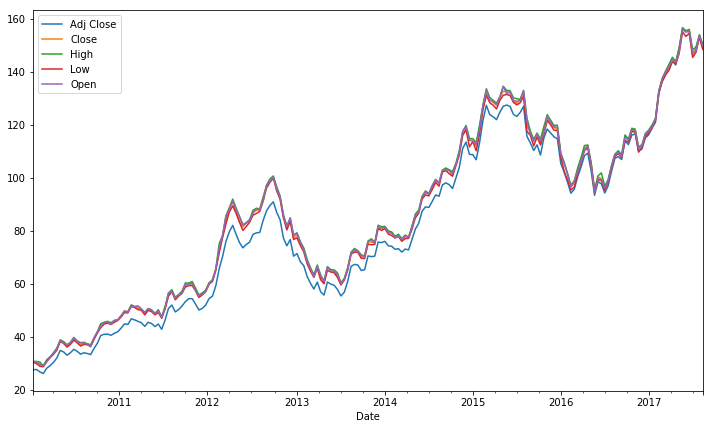

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

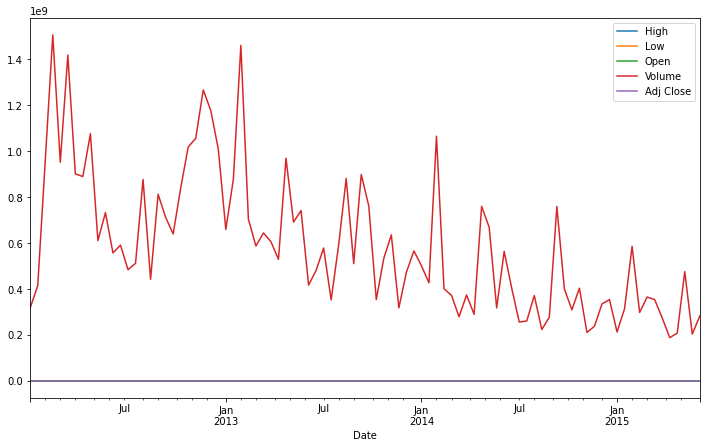

In [ ]:
aapl2.drop("Close", axis=1).resample("2W").max().plot();

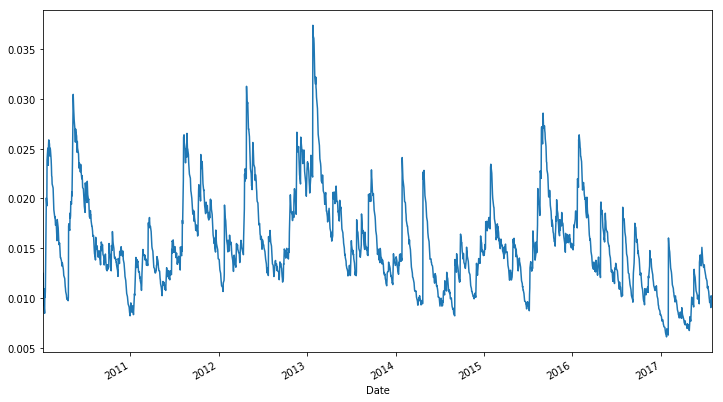

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

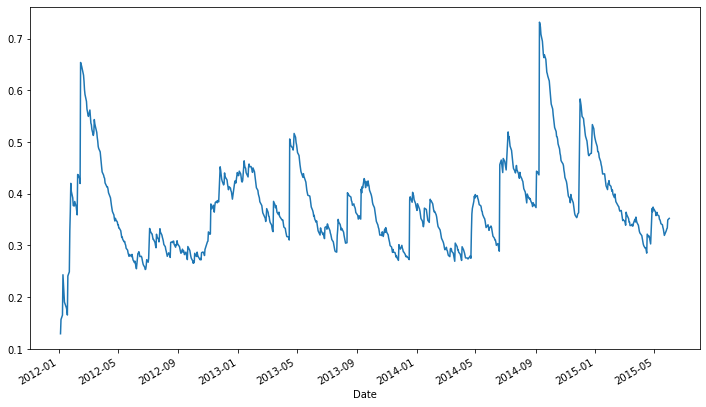

In [ ]:
aapl2["Volume"].pct_change().ewm(span=50).std().plot()

# "Real World" Data

In [ ]:
!pip install demos.avocados

ERROR: Could not find a version that satisfies the requirement demos.avocados (from versions: none)
ERROR: No matching distribution found for demos.avocados


In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
cars = pd.read_csv("cars.csv")
cars = cars.rename(columns={"Unnamed: 0": "Cars"})
cars
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes
cars.dtypes
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();
fig = plt.figure()
ax = fig.add_axes([0,1,5,5])
ax.bar(cars["Cars"], cars["mpg"])
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,1,5,5])
ax.bar(cars["Cars"], cars["cyl"])
plt.show()
fig = plt.figure()
ax = fig.add_axes([0,1,5,5])
ax.bar(cars["Cars"], cars["hp"])
plt.show()

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.50,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.50,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.50,1.99
...,...,...,...,...,...,...,...,...
1938,2015-12-18 00:00:00+00:00,SOUTHWEST,GREENSKIN,False,48,0.16,0.16,0.16
1939,2015-12-18 00:00:00+00:00,NORTHWEST,HASS,False,676,1.45,0.68,2.50
1940,2015-12-18 00:00:00+00:00,NORTHWEST,HASS,True,40,1.55,1.50,1.67
1941,2015-12-18 00:00:00+00:00,ALASKA,HASS,False,11,1.90,1.50,1.99


In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

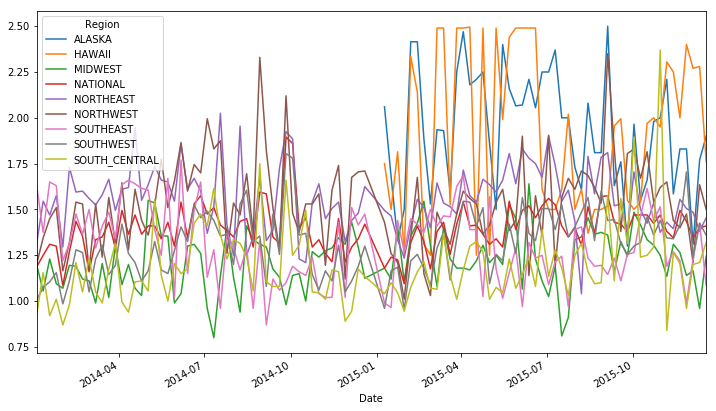

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

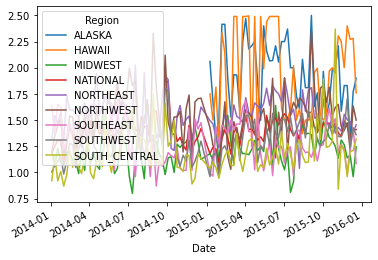

In [ ]:
hass2= verduras[verduras.Variety=="HASS"]
hass2.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

NameError: ignored

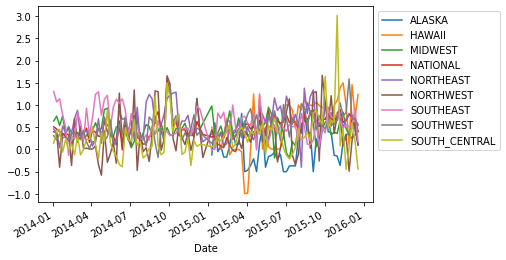

In [ ]:
import matplotlib.pyplot as plt

organic_spread_by_region(hass2).plot();
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread = organic_spread_by_region(hass).corr()
spread

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [ ]:
correlacion= organic_spread_by_region(hass2).corr()
correlacion

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


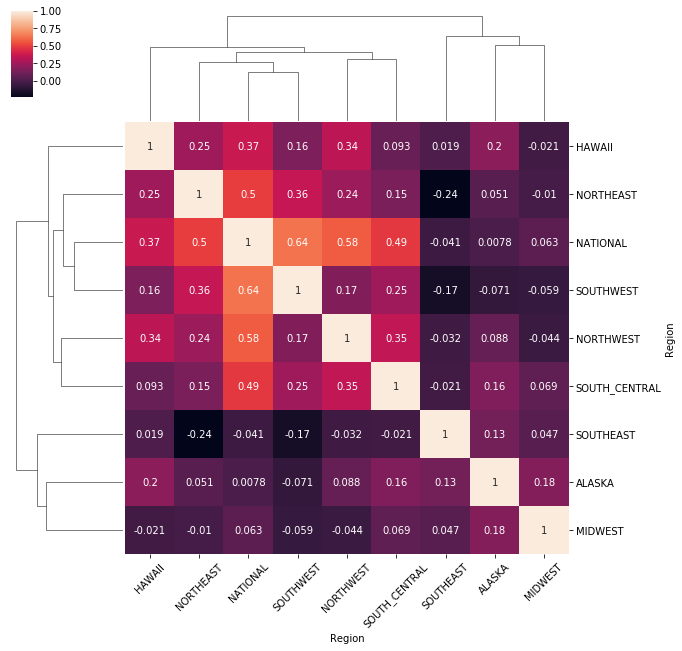

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [ ]:
flights = sns.load_dataset('flights')
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights);

# Thanks!